In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Linear

### Piecewise-Linear Transformation

In [2]:
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

img = cv2.imread('lena.pgm') 
  
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
pixelVal_vec = np.vectorize(pixelVal) 
  
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 
  
cv2.imwrite('contrast_stretch.jpg', contrast_stretched) 

True

## Non-Linear

### Log Transformation

True

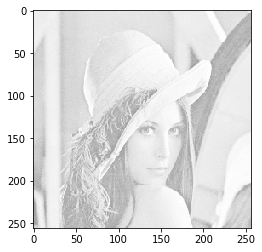

In [3]:
img = cv2.imread('lena.pgm') 
  
c = 255/(np.log(1 + np.max(img))) 
log_transformed = c * np.log(1 + img) 
  
log_transformed = np.array(log_transformed, dtype = np.uint8)
plt.imshow(log_transformed)
cv2.imwrite('log_transform.png', log_transformed) 

### Power-Law (Gamma) Transformation

In [4]:
img = cv2.imread('lena.pgm') 
  
for gamma in [0.1, 0.5, 1.2, 2.2]: 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected) 

## Histogram

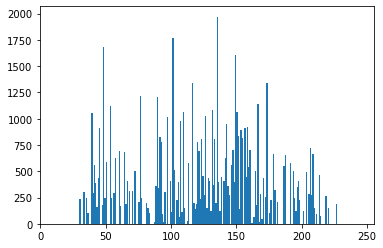

In [5]:
im = cv2.imread('lena.pgm')
vals = im.mean(axis=2).flatten()
counts, bins = np.histogram(vals, range(257))
plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
plt.xlim([-0.5, 255.5])
plt.show()